In [ ]:
from utilities.constants import *
from utilities.temporal_analysis import *
import matplotlib.pyplot as plt
from utilities.model_matching_computation import *
import pandas as pd
from music21 import *
from utilities.corpus_search import *


# DATASET PREPARATION
df_labeled_notes_t1 = pd.read_json('note_corpus.json', orient ='split', compression = 'infer')
df_labeled_notes_t1 = df_labeled_notes_t1.dropna()
df_labeled_notes_t1['NoteAndRest'] = df_labeled_notes_t1['NoteAndRest'].apply(lambda x: re.sub(r'\d+', '', x))
# Section with length smaller than THRESHOLD are merged together by label 
THRESHOLD = 600 # 10 minutes
def run_experiment(label):
    df_notes_merged = merge_sections(df_labeled_notes_t1, label)

    # Get the unique section_ids in df_notes_merged where the length_sectionmp is greater than or equal to 1000
    df_sec = df_notes_merged[(df_notes_merged['length_section'] >= THRESHOLD) ]['section_id'].unique()
    df = df_notes_merged.groupby('section_id', as_index=False)[label].first()
    df = df[df[label].isin(LABEL_LIST_TRAIN[label])]
    #df_sec = df_notes_merged[df_notes_merged['length_section'] < 700]['section_id'].unique()

    df = df[df['section_id'].isin(df_sec)]
    y_test, y_pred, overall_acc = skf_model_matching_label(df, df_notes_merged, std= 25, k= 100, test_dim= 5,  label= label, random_state=94)  
    print_performance(y_test, y_pred, overall_acc)


1454.6319725168469
370
Precision: 0.710438
Std. Deviation: 0.0599
Weighted recall for each class: 0.710438
Global recall: 0.710438
F1 score: 0.710438


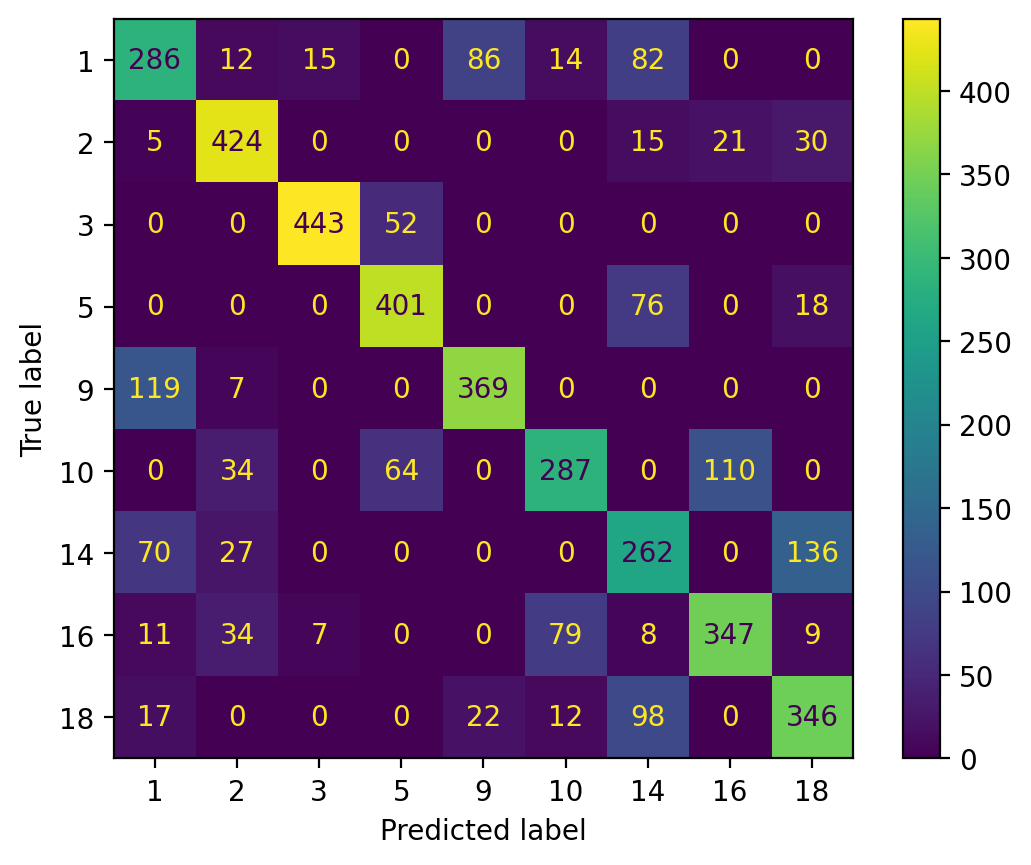

In [ ]:
run_experiment('tab')

1470.0573704356812
370
Precision: 0.664802
Std. Deviation: 0.0617
Weighted recall for each class: 0.664802
Global recall: 0.664802
F1 score: 0.664802


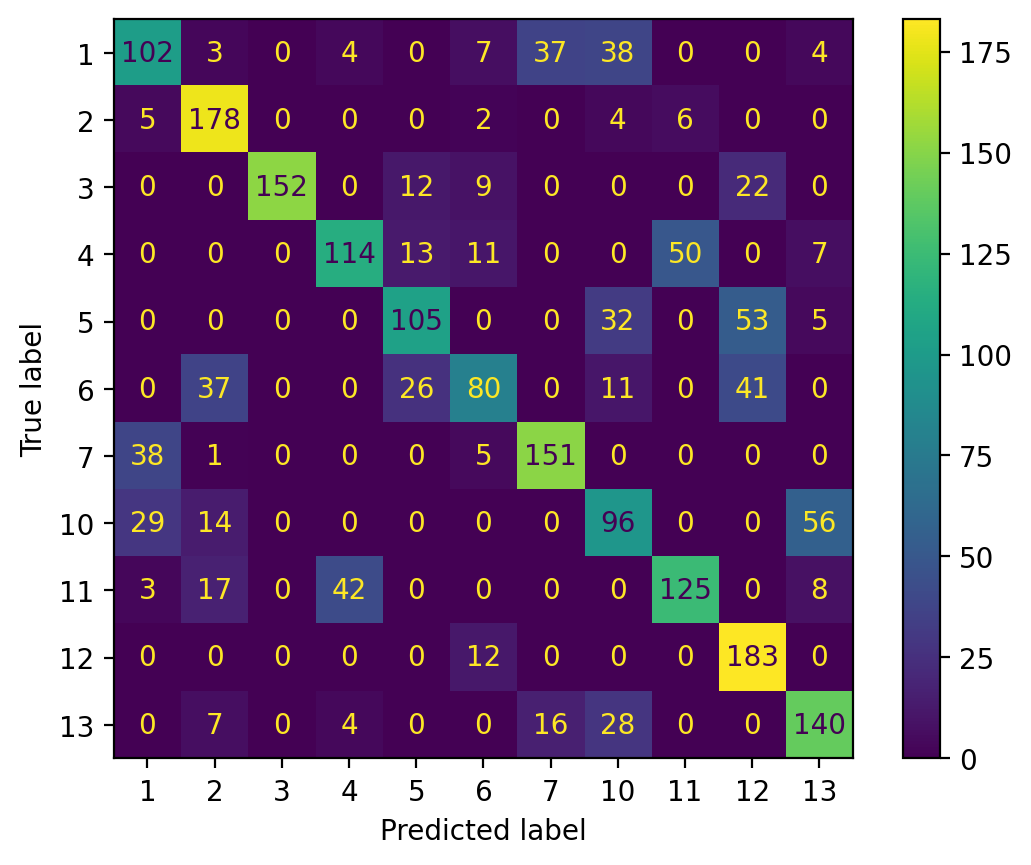

In [ ]:
run_experiment('nawba')

Precision: 0.309091
Std. Deviation: 0.0673
Weighted recall for each class: 0.309091
Global recall: 0.309091
F1 score: 0.309091


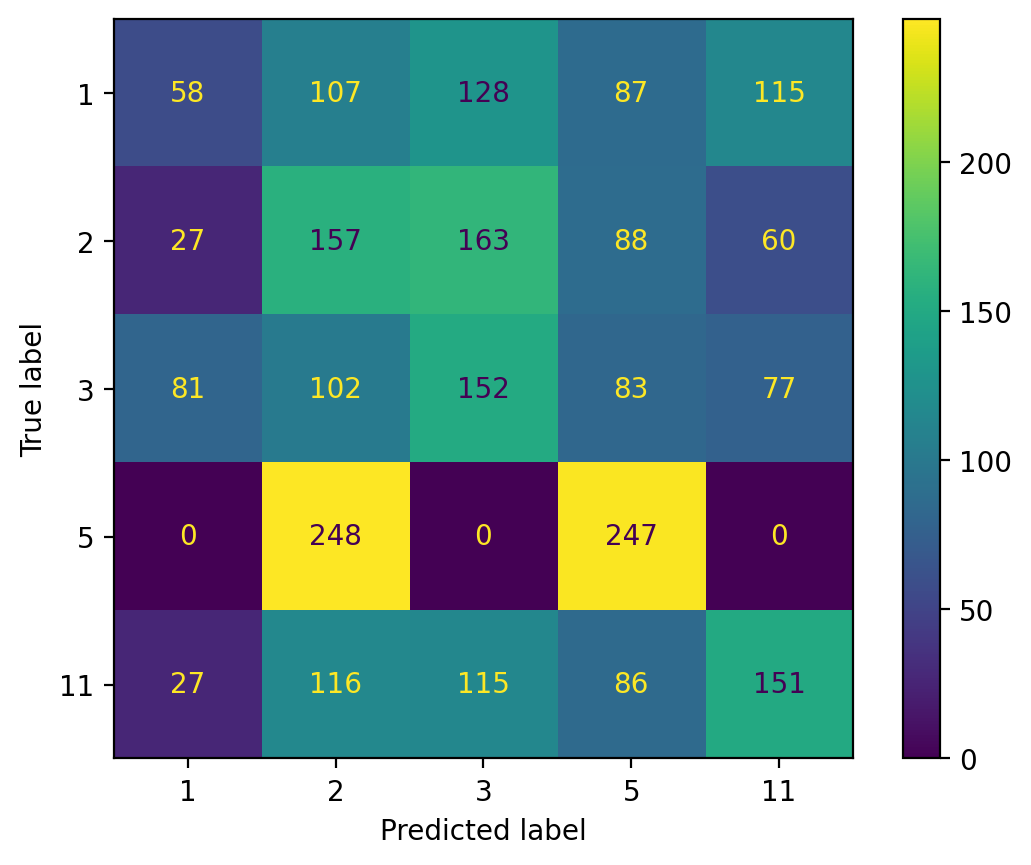

In [4]:
run_experiment('mizan')